In [3]:
# Portfolio Optimization

In [4]:
import numpy as np
import pandas as pd

In [6]:
from pandas_datareader import data

In [17]:
import datetime as dt
import matplotlib.pyplot as plt

import time
%matplotlib inline

In [48]:
r_f=0.00

In [49]:
symbols = ['AAPL', 'MSFT', 'TSLA', 'FB', 'GOOGL']

In [50]:
n = len(symbols)

In [51]:
t0=dt.datetime(2013,1,1)

In [52]:
T=dt.datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)

In [53]:
df = pd.DataFrame()

In [54]:
for s in symbols:
    df[s] = data.DataReader(s, data_source='yahoo',start=t0, end=T)['Adj Close']

In [55]:
df.columns = symbols

In [56]:
T.strftime("%Y%m%d")

'20191014'

In [57]:
sf=r'D:\Career\progs\Python'

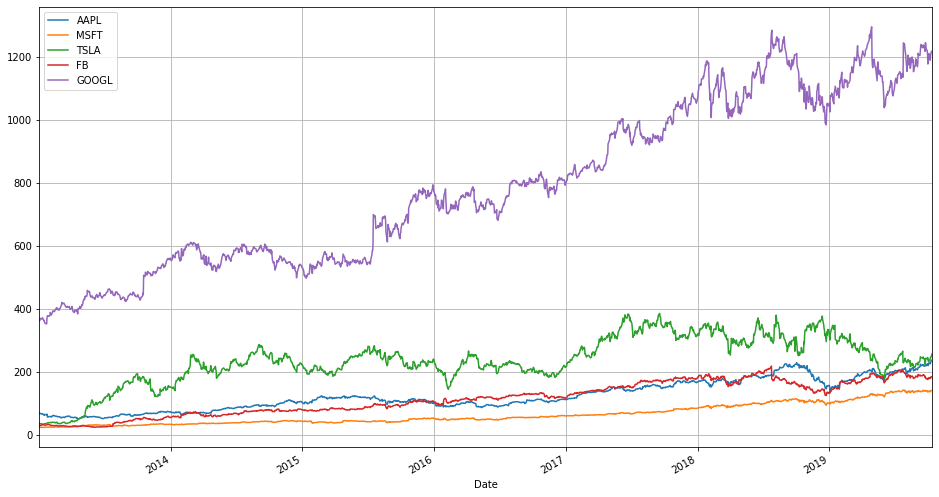

In [58]:
plot1 = df.plot(figsize=(16, 9), grid=True)
#plot1.get_figure().savefig(sf + '\\' + T.strftime("%Y%m%d") + '_CAPM1_stock_prices.png', dpi=1000)

In [59]:
r = np.log(df / df.shift(1))

In [60]:
# Use a factor of 252 trading days to annualize the daily returns.
μ=r.mean() * 252

In [61]:
Σ=r.cov() * 252

In [62]:
# Portfolio weights
w = np.random.rand(n)
w /= np.sum(w)

In [ ]:
#np.sum(r.mean() * w) * 252
#r_P_w=np.dot(w.T,μ)
#expected_portfolio_return=np.dot(w.T,mu)
#μ

In [ ]:
#portfolio variance
#np.dot(w.T, np.dot(r.cov() * 252, w))
#v_P_w=np.dot(w.T, np.dot(Σ, w))

In [ ]:
#The (expected) portfolio standard deviation or volatility
#σ=np.sqrt(np.dot(w.T, np.dot(r.cov() * 252, w)))
#σ_P_w=np.sqrt(np.dot(w.T, np.dot(Σ, w)))

In [ ]:
#np.sqrt(np.dot(w.T, np.dot(r.cov() * 252, w)))
#Σ
#σ

In [63]:
Elapsed= np.array([])
m=1*10**5

start = time.process_time()

r_P = np.array([])
v_P = np.array([])
for x in range(m):
    w = np.random.rand(n)
    w /= np.sum(w)
    #expected_portfolio_return
    r_P=np.append(r_P, np.dot(w.T,μ))
    #portfolio standard deviation or volatility
    v_P=np.append(v_P, np.sqrt(np.dot(w.T, np.dot(Σ, w))))

elapsed_time1 = time.process_time() - start
print(elapsed_time1)

88.03125


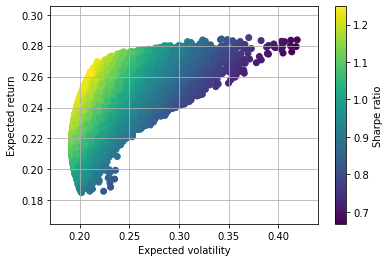

In [64]:
plt.scatter(v_P, r_P, c=r_P / v_P, marker='o')
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')
#plt.savefig(sf + '\\' + T.strftime("%Y%m%d") +'CAPM2_.png', dpi=1000)

In [65]:
def statistics(weights):
    ''' Returns portfolio statistics.
    Parameters
    ==========
    weights : array-like
    weights for different securities in portfolio
    Returns
    =======
    pret : float
    expected portfolio return
    pvol : float
    expected portfolio volatility
    pret / pvol : float
    Sharpe ratio for rf=0
    '''
    w = np.array(weights)
    r_P=np.dot(w.T,μ)
    v_P=np.sqrt(np.dot(w.T, np.dot(Σ, w)))
    SR_P=r_P/v_P
    return np.array([r_P, v_P, SR_P])

In [66]:
import scipy.optimize as sco

In [67]:
def min_func_sharpe(weights):
    #Sharp-Ratio is the 2nd element of the statistics array
    #Maximizing SR is the same as minimizing -SR
    return -statistics(weights)[2]

In [68]:
bnds = tuple((0, 1) for x in range(n))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
opts = sco.minimize(min_func_sharpe, n * [1.0 / n,], method='SLSQP', bounds=bnds, constraints=cons)

In [69]:
#For the expected return, volatility, and Sharpe ratio, we get:

#optimal portfolio weights
opts['x'].round(4)

array([0.0897, 0.6159, 0.0795, 0.2149, 0.    ])

In [70]:
statistics(opts['x']).round(4)

array([0.2614, 0.2091, 1.25  ])

In [71]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [72]:
optv = sco.minimize(min_func_variance, n * [1.0 / n,],method='SLSQP', bounds=bnds, constraints=cons)

In [73]:
#This portfolio mix leads to the absolute minimum variance portfolio:
optv['x'].round(4)

array([0.2827, 0.3228, 0.0286, 0.0615, 0.3044])

In [75]:
#For the expected return, volatility, and Sharpe ratio, we get:
statistics(optv['x']).round(4)

array([0.2164, 0.1918, 1.1283])

In [ ]:
#Efficient Frontier

In [76]:
def min_func_port(weights):
    return statistics(weights)[1]

In [77]:
trets = np.linspace( -0.2, 0.35, 1000)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bnds = tuple((0, 1) for x in w)
    res = sco.minimize(min_func_port, n * [1.0 / n,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

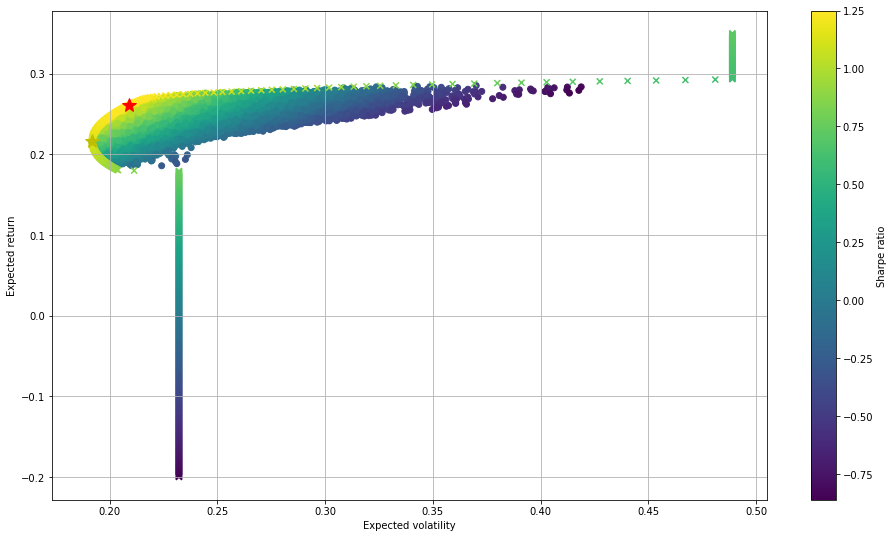

In [78]:
plt.figure(figsize=(16, 9))
plt.scatter(v_P, r_P, c=r_P / v_P, marker='o')
# random portfolio composition
plt.scatter(tvols, trets, c=trets / tvols, marker='x')
# efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
'r*', markersize=15.0)
# portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
'y*', markersize=15.0)
# minimum variance portfolio
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label='Sharpe ratio')
#plt.savefig(sf + '\\'+ T.strftime("%Y%m%d") + 'CAPM3_min_risk_portfolios.png', dpi=1000)

In [43]:
import scipy.interpolate as sci

In [44]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [45]:
#df_eee=pd.DataFrame(np.array([evols,erets]).T, columns=["evols","erets"])
#df_eee.drop_duplicates("evols", inplace=True)
#tck = sci.splrep(df_eee["evols"],df_eee["erets"])

In [46]:
evols=np.unique(evols)
erets=np.unique(erets)

In [47]:
tck = sci.splrep(evols, erets)

TypeError: Lengths of the first three arguments (x,y,w) must be equal

In [ ]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)

In [ ]:
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [ ]:
def equations(p, rf=r_f):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])
opt

In [ ]:
np.round(equations(opt), 6)